# Cancer Dataset

In the healthcare sector, it is important to address the impact of False Positives and False Negatives on the patient. Thus, it is imperative that we keep an eye on minimizing the false positives and false negatives.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Machine Learning/Data Training/Cancer Dataset/cancer_data.csv')
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [3]:
data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

No missing values.

In [4]:
data.shape

(569, 6)

In [5]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

## Split the data into training and testing sets

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print('Shape x_train: ', x_train.shape)
print('Shape y_train: ', y_train.shape)
print('Shape x_test: ', x_test.shape)
print('Shape y_test: ', y_test.shape)

Shape x_train:  (455, 5)
Shape y_train:  (455,)
Shape x_test:  (114, 5)
Shape y_test:  (114,)


## Standardization

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [8]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

## Support Vector Machine

In [9]:
from sklearn.svm import SVC
support_vector_classifier = SVC()
support_vector_classifier.fit(x_train, y_train)
support_vector_classifier.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [10]:
y_pred_SVC = support_vector_classifier.predict(x_test)

In [11]:
y_pred_SVC_train = support_vector_classifier.predict(x_train)
print('Accuracy of the training dataset: ', accuracy_score(y_train, y_pred_SVC_train))
print('Accuracy of the testing dataset: ', accuracy_score(y_test, y_pred_SVC))

Accuracy of the training dataset:  0.9362637362637363
Accuracy of the testing dataset:  0.9473684210526315


There is no overfitting problem here.

In [12]:
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



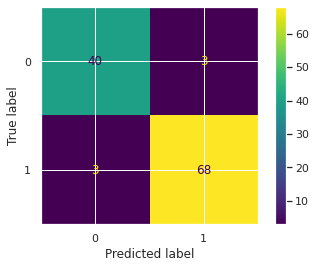

In [13]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_SVC)

If we predict manually with the following parameters: 

mean_radius = 18.5,	mean_texture = 19.8, mean_perimeter = 130.1, 
mean_area	= 516 and mean_smoothness = 0.05

We get the appropriate prediction.

In [14]:
support_vector_classifier.predict(scaler.transform([[18.5, 19.8, 130.1, 516, 0.05]]))

array([0])

'0' corresponds to the case that the patient in question has no cancer.

## k-Nearest Neighbours

In [15]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier()
kNN.fit(x_train, y_train)
kNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [16]:
y_pred_kNN = kNN.predict(x_test)

In [17]:
y_pred_kNN_train = kNN.predict(x_train)
print('Accuracy of the training dataset: ', accuracy_score(y_train, y_pred_kNN_train))
print('Accuracy of the testing dataset: ', accuracy_score(y_test, y_pred_kNN))

Accuracy of the training dataset:  0.9274725274725275
Accuracy of the testing dataset:  0.9298245614035088


No Overfitting problems here.

In [18]:
print(classification_report(y_test, y_pred_kNN))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        43
           1       0.94      0.94      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



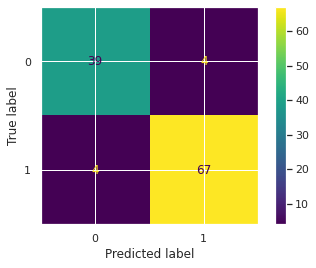

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_kNN)

## Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB
Gaussian = GaussianNB()
Gaussian.fit(x_train, y_train)
Gaussian.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [21]:
y_pred_Gaussian = Gaussian.predict(x_test)

In [22]:
y_pred_Gaussian_train = Gaussian.predict(x_train)
print('Accuracy of the training dataset: ', accuracy_score(y_train, y_pred_Gaussian_train))
print('Accuracy of the testing dataset: ', accuracy_score(y_test, y_pred_Gaussian))

Accuracy of the training dataset:  0.8967032967032967
Accuracy of the testing dataset:  0.9473684210526315


In [23]:
print('Classification Report GaussianNB: \n', classification_report(y_test, y_pred_Gaussian))

Classification Report GaussianNB: 
               precision    recall  f1-score   support

           0       1.00      0.86      0.92        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



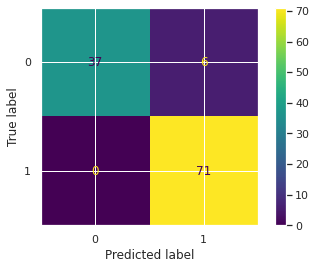

In [24]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_Gaussian)

**For decision tree classifier and random forest classifier, since the dataset is small, we limit the *max_depth* parameter to prevent overfitting.**

## Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier(max_depth=5)
DT_classifier.fit(x_train, y_train)
DT_classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [26]:
y_pred_DT = DT_classifier.predict(x_test)

In [27]:
y_pred_DT_train = DT_classifier.predict(x_train)
print('Accuracy of the training dataset: ', accuracy_score(y_train, y_pred_DT_train))
print('Accuracy of the testing dataset: ', accuracy_score(y_test, y_pred_DT))

Accuracy of the training dataset:  0.9648351648351648
Accuracy of the testing dataset:  0.9210526315789473


In [28]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        43
           1       0.94      0.93      0.94        71

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



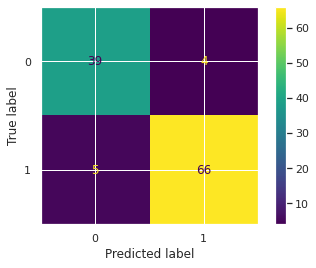

In [29]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_DT)

## Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(max_depth=5)
RF_classifier.fit(x_train, y_train)
RF_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [31]:
y_pred_RF = RF_classifier.predict(x_test)

In [32]:
y_pred_RF_train = RF_classifier.predict(x_train)
print('Accuracy of the training dataset: ', accuracy_score(y_train, y_pred_RF_train))
print('Accuracy of the testing dataset: ', accuracy_score(y_test, y_pred_RF))

Accuracy of the training dataset:  0.9714285714285714
Accuracy of the testing dataset:  0.9649122807017544


In [33]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



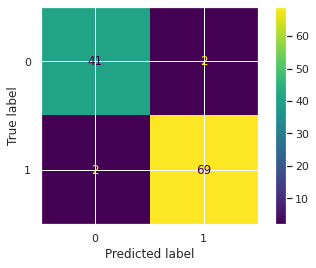

In [34]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_RF)

# ROC Curve

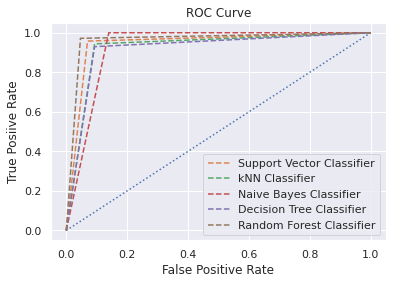

In [35]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.plot([0,1], [0,1], ':')
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred_SVC)
plt.plot(fpr1, tpr1, '--', label='Support Vector Classifier')
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred_kNN)
plt.plot(fpr2, tpr2, '--', label='kNN Classifier')
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred_Gaussian)
plt.plot(fpr3, tpr3, '--', label='Naive Bayes Classifier')
fpr4, tpr4, thresholds = roc_curve(y_test, y_pred_DT)
plt.plot(fpr4, tpr4, '--', label='Decision Tree Classifier')
fpr5, tpr5, thresholds = roc_curve(y_test, y_pred_RF)
plt.plot(fpr5, tpr5, '--', label='Random Forest Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Posiive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

It can be seen that the Random Forests Classifier is the best option for this dataset, given that we wish to minimize the false positives.